# CS4168 Data Mining
Aoife Kennedy


Lab 1: Exploratory Data Analysis


Question: Does a client's balance and marital status influence their chances of subscribing to a term deposit?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/bank.csv"
df = pd.read_csv(path)

In [4]:
# Print first 5 rows
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Print last 5 rows
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
# The dimensions of the bank.csv dataframe
df.shape

(2000, 17)

# Statistics for Numerical Attributes

In [7]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


<ipython-input-8-3e9fc729ad35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


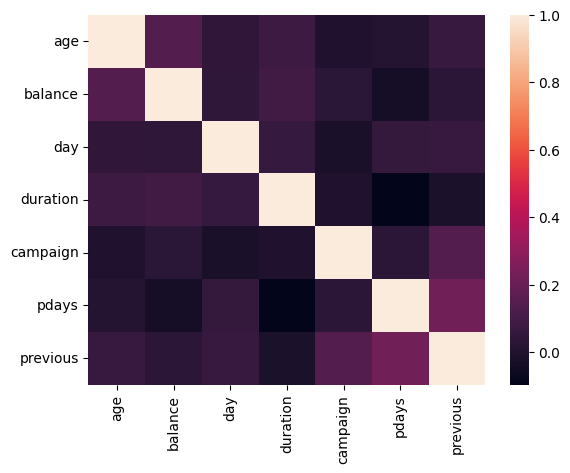

In [8]:
#correlation matrix
sns.heatmap(df.corr());

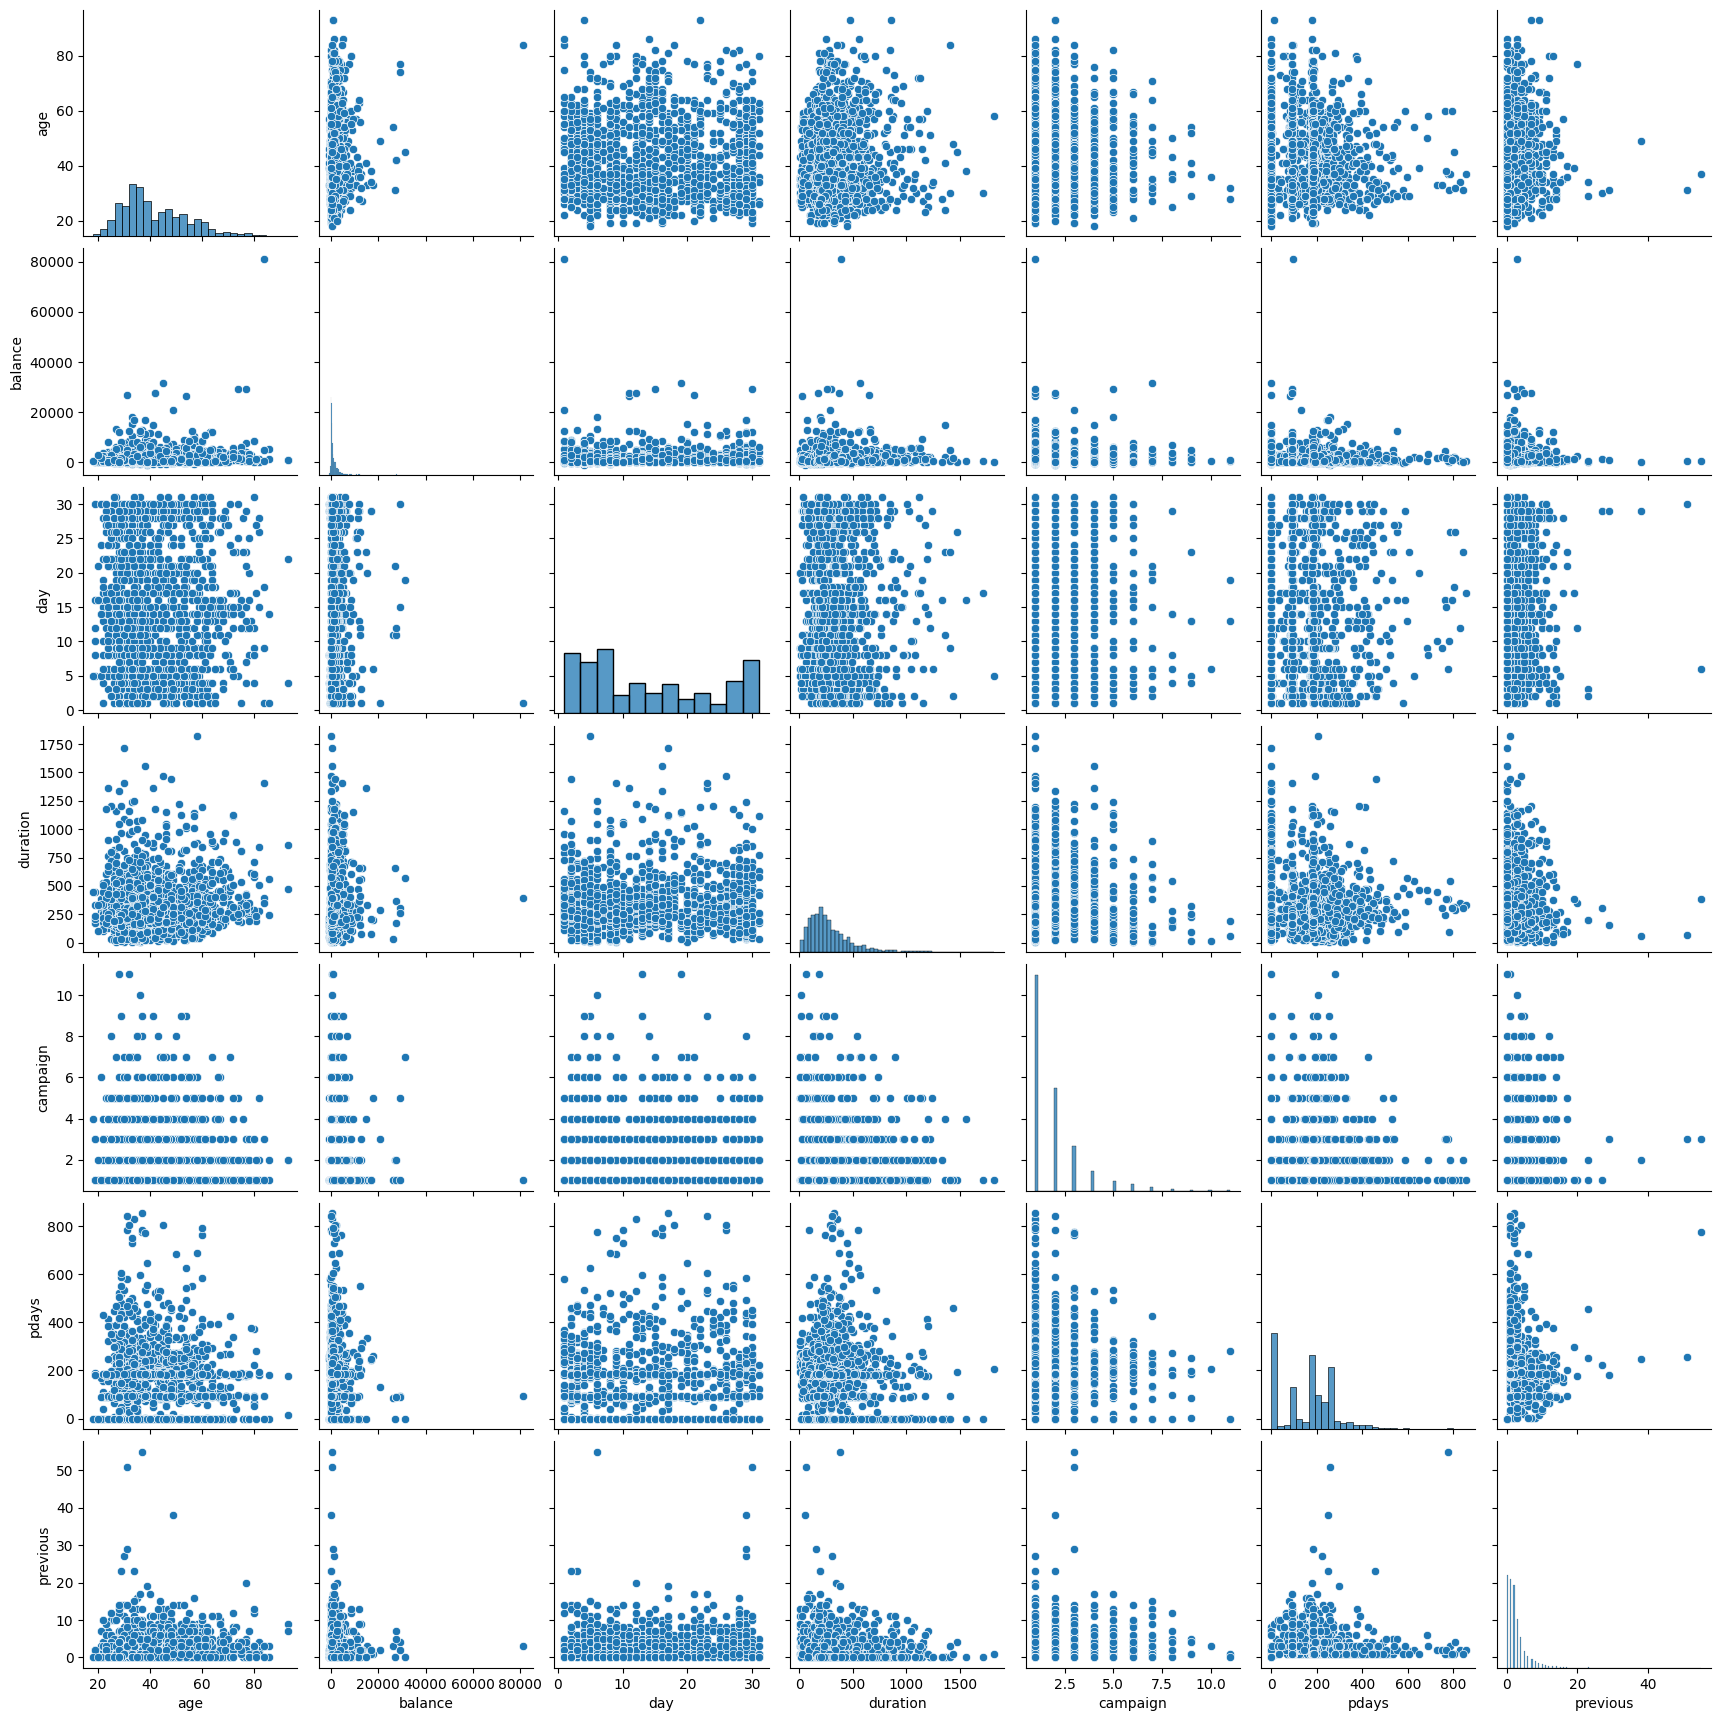

In [9]:
#applying the method dropna() we drop all rows with missing values
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

# Statistics for Categorical Attributes


In [12]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [13]:
df['job'].count()

1990

# Distribution Analysis for Numerical Attributes

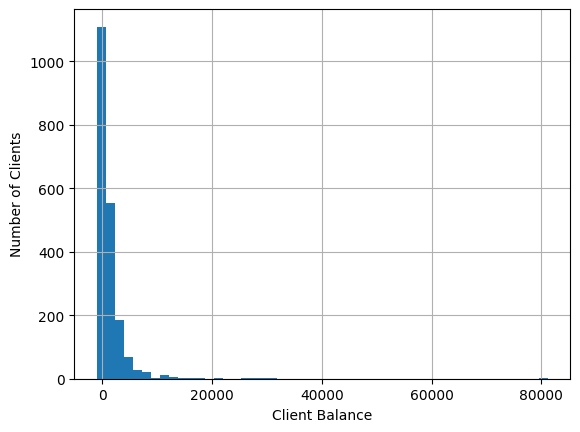

In [22]:
df['balance'].hist(bins=50)
plt.xlabel('Client Balance')
plt.ylabel('Number of Clients')
plt.show()

From the graph above which is analysing the clients' balance, we can see that the majority of clients have a balance of under 20000.

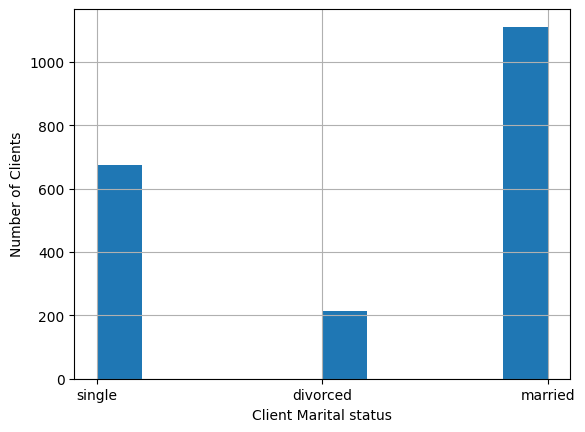

In [23]:
df['marital'].hist()
plt.xlabel('Client Marital status')
plt.ylabel('Number of Clients')
plt.show()

From the graph above which is analysing the clients marital status, we can see that:
Over 1000 clients are married
Over 600 clients are single
Just over 200 clients are divorced

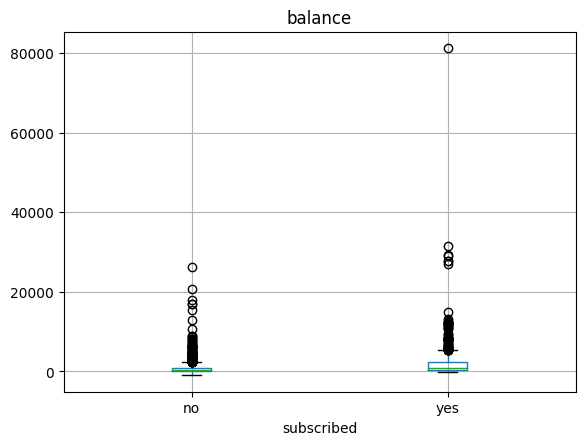

In [24]:
df.boxplot(column = 'balance', by = 'subscribed')
plt.suptitle("")
plt.show()

The graph above shows the balance of those who subscribed to the term deposit against those who did not

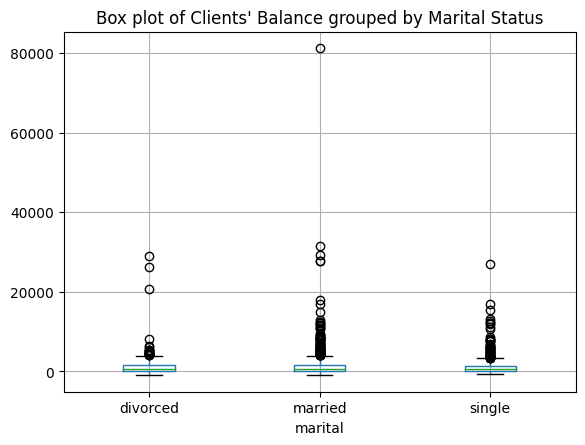

In [26]:
df.boxplot(column = 'balance', by = 'marital')
plt.title('Box plot of Clients\' Balance grouped by Marital Status')
plt.suptitle("")
plt.show()

From the graph above, we can see that

* Married clients most commonly have a balance between 0 - 20,000
* Single clients have a similar balance to married
* Divorced clients have a noticeable lower balance between 0 - 10,000
* Married is an outlier column with one client balance being over 80,000

# Generate two plots with the combined distribution of attributes and draw conclusions from them

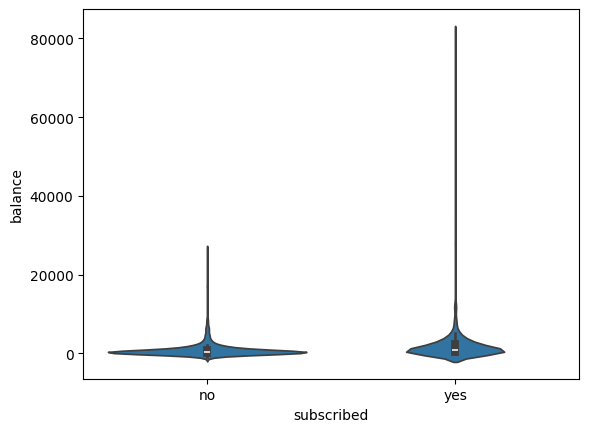

In [27]:
sns.violinplot(data = df, x='subscribed', y='balance')
plt.show()

From the graph above, we can see the subscribers have a wider balance distribution than the non-subscribers

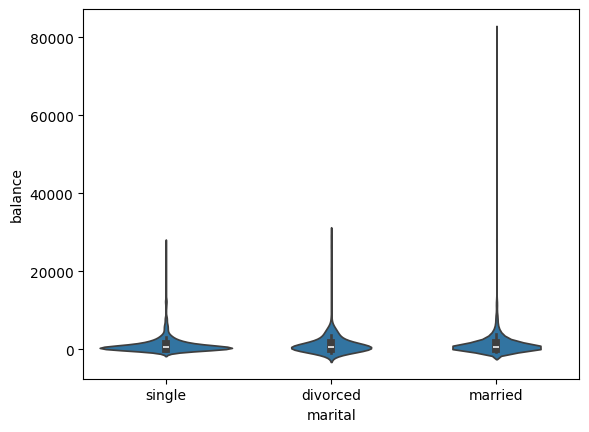

In [28]:
sns.violinplot(data = df, x='marital', y='balance')
plt.show()

From the graph above, we can see that clients in the single or divorced group have a similar distribution while the highest client balance is found in the married group.

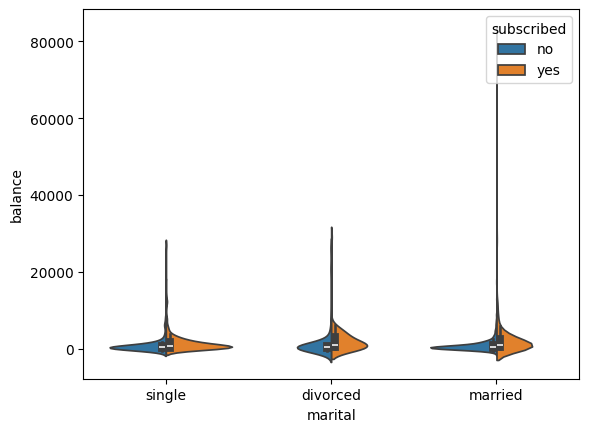

In [29]:
sns.violinplot(data = df, x='marital', y='balance', hue='subscribed', split=True)
plt.show()

From the graph above, we can see that:

* Single subscribers are more evenly distributed than non-subscribers who are single, however the distribution is very similar.
* Divorced subscribers are more evenly distributed than non-subscribers who are divorced however, the distribution is somewhat similar.
* Married subscribers are more evenly distributed than non-subscribers who are married

<Axes: xlabel='marital', ylabel='balance'>

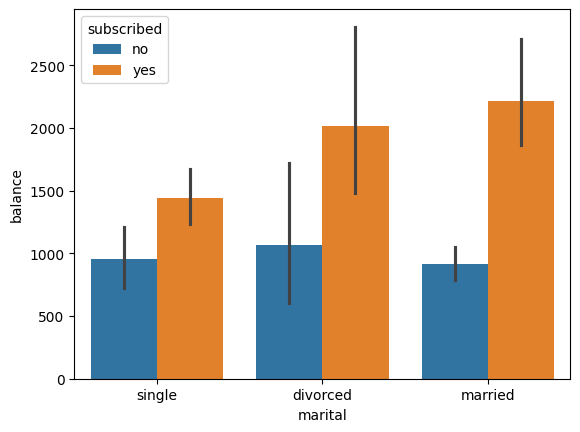

In [30]:
sns.barplot(hue = 'subscribed', x = 'marital', y = 'balance', data = df)

In the graph shown above we can see that a higher balance of clients have subscribed across the spectrum. We can see that married clients have a higher average, followed closely by divorced clients and then by single clients.

* Compared to married clients who did not subscribe, married clients who did have a greater average balance.
* When compared to divorced clients who did not subscribe, divorced clients who did have a greater average balance.
*The average balance of single clients who subscribed is higher than that of single clients who did not.
* Married clients with subscriptions had the greatest average balance; divorced clients with subscriptions have virtually similar average balances.
* Married clients who have not subscribed have the lowest average balance. Among the non-subscribers, it has the lowest average.
* Single clients had the lowest average balance among those that did subscribe.

# Conclusion

* The balance distribution of clients who have subscribed to the term deposit is higher than that of those who have not.
* Compared to non-subscribers, subscribers in every marital status have more uniformly dispersed balances.
* The lowest average balance is possessed by married clients who have not subscribed.
* Clients who are married and have larger balances are more likely to have subscribed.